<a href="https://colab.research.google.com/github/RadhikaVarvatte/RadhikaVarvatte/blob/main/Customer_Personality_Analysis_Group_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign1 (1).xlsx to marketing_campaign1 (1).xlsx


In [ ]:
df = pd.read_excel('marketing_campaign1 (1).xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## Checking for Missing Values and Removing Unnecessary Rows

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We will verify the Income column as there are some missing values and substitute the mean or median for the missing values.

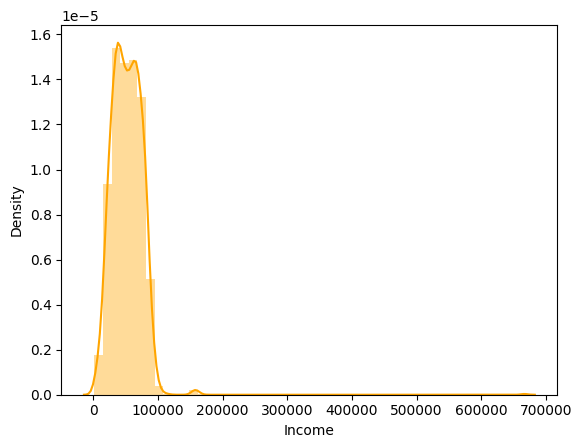

In [ ]:
sns.distplot(df['Income'], color='Orange')
plt.show()


We will use the median to fill in the missing numbers because the data is left skewed.

In [ ]:
#FILLING THE MISSING VALUES WITH THE MEDIAN VALUES..
df['Income']=df['Income'].fillna(df['Income'].median())

In [ ]:
## CHECKING FOR DUPLICATES
df.duplicated().any()

False

In [ ]:
#DETERMINING THE COUNT OF DISTINCT VALUES WITHIN EACH COLUMN
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Note:-"Z_CostContact" and "Z_Revenue" in the above cell have the same value in every row, thus they won't add anything to the model construction. So we can drop them

In [ ]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

## Applying Univariate_ Analysis and Combining Similar Categories into one Feature

### Univariate_Analysis :-

1.Year_Birth_Variable_Analysis.

In [ ]:
# Checking how many distinct categories are present in the "Year_Birth"
print("Unique categories present in the Year_Birth:",df["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


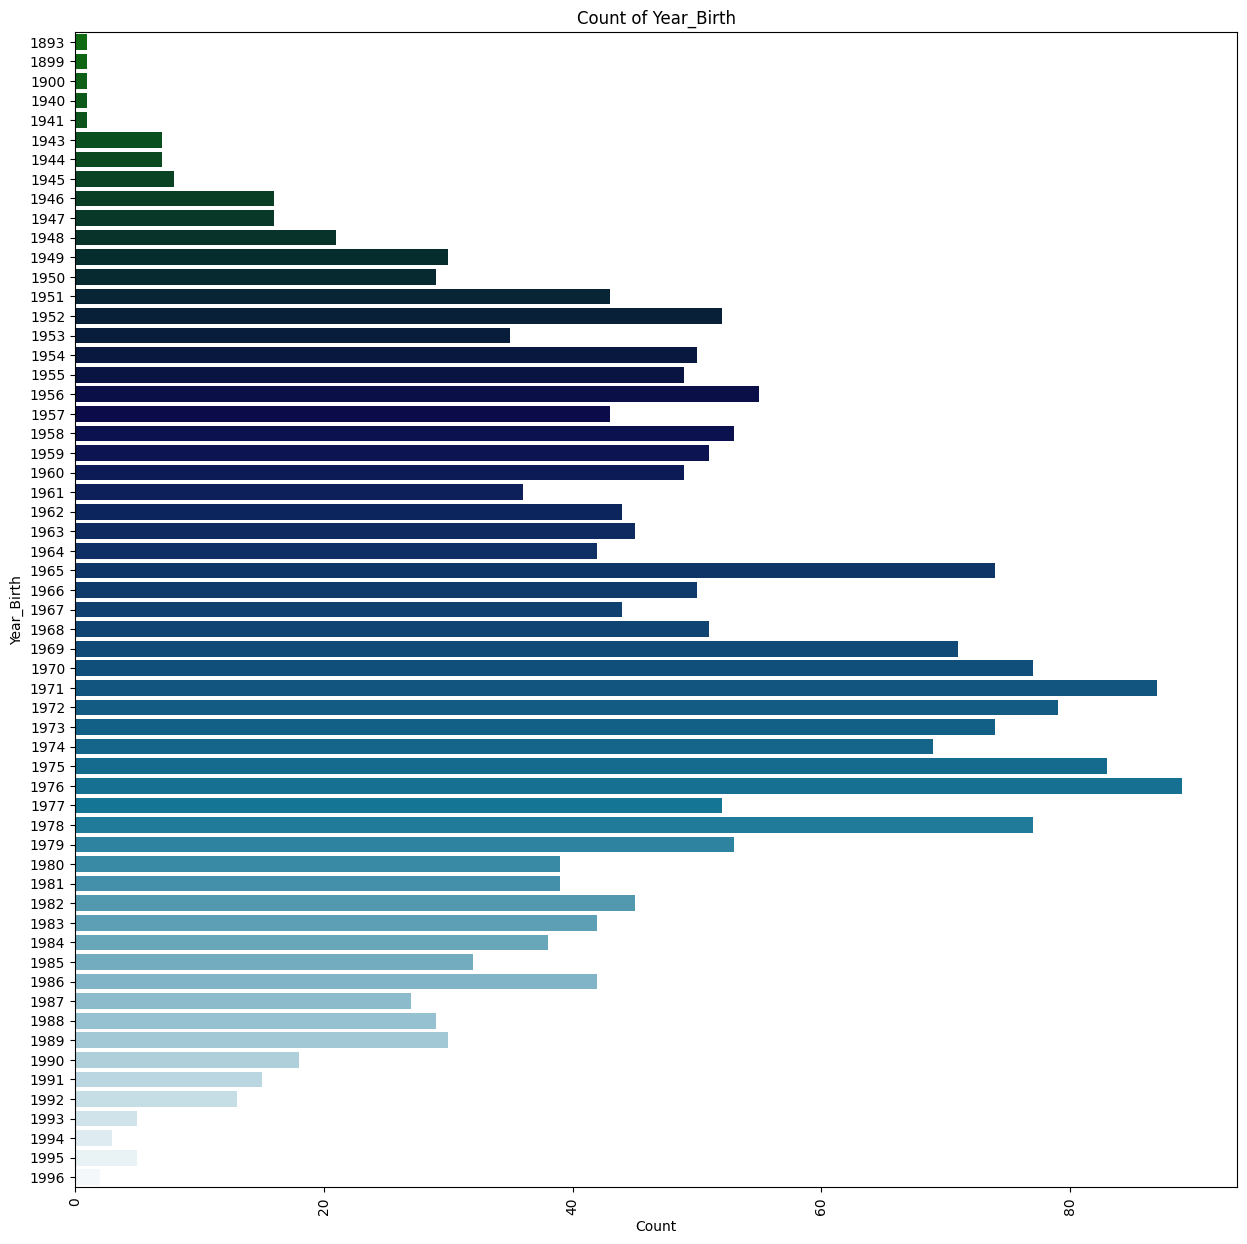

In [ ]:

def uni_V(df, col):
    plt.figure(figsize=(15, 15))
    sns.countplot(data=df, y=col, palette='ocean')  # Using 'ocean' color palette
    plt.xlabel('Count')  # Label for the x-axis
    plt.ylabel(col)  # Label for the y-axis
    plt.title(f'Count of {col}')  # Title for the plot

    plt.xticks(rotation=90)
    plt.show()

# Assuming df is your DataFrame
uni_V(df, 'Year_Birth')


Data points in year birth are uniformly distributed

2.Education_Variable Analysis.

In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#CHANGING CATEGORIES TO ONLY INCLUDE "UG" AND "PG"
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

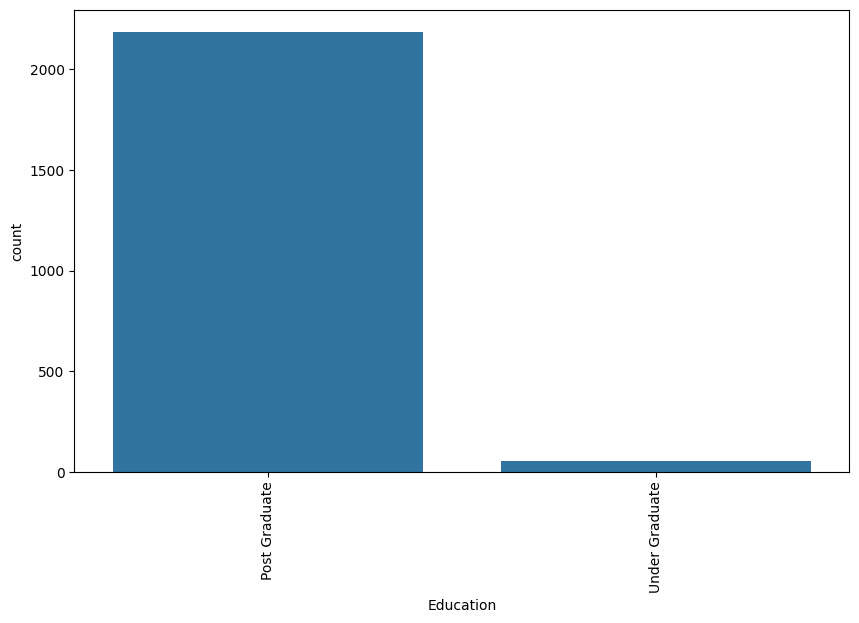

In [ ]:
def uni_V(df, col):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col)

    plt.xticks(rotation=90)
    plt.show()

# Assuming df is your DataFrame
uni_V(df, 'Education')

Our observation indicates that the majority of data points pertain to individuals who have completed their post-graduate education.

3. Marital_Status Variable Analysis

In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
#SUBSTITUTING CONFLICTING VALUES WITHIN THE "MARITAL_STATUS" FIELD..
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

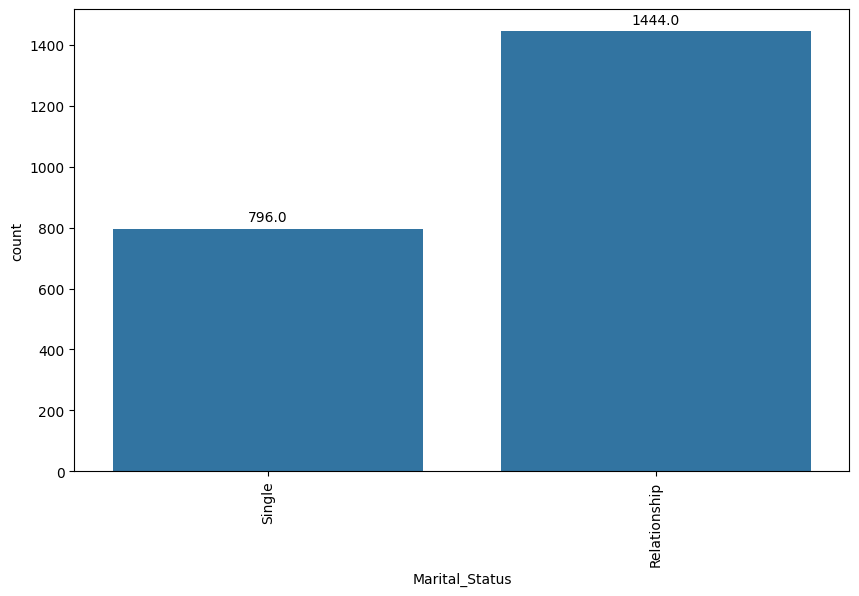

In [ ]:
def uni_V(df, col):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col)

    # Add labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height}",
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  # Offset for label placement
                    textcoords="offset points",
                    ha='center', va='bottom')  # Horizontal and vertical alignment

    plt.xticks(rotation=90)
    plt.show()

# Assuming df is your DataFrame
uni_V(df, 'Marital_Status')

64.46% % of Customers in the dataset are in "Relationship".
35.54% of Customers in the dataset are "Single".

4. Income Variable Analysis

In [ ]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

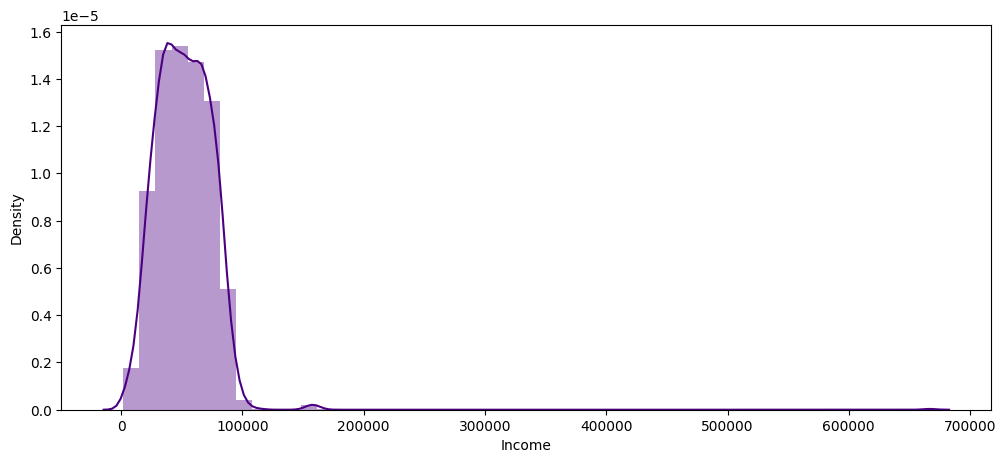

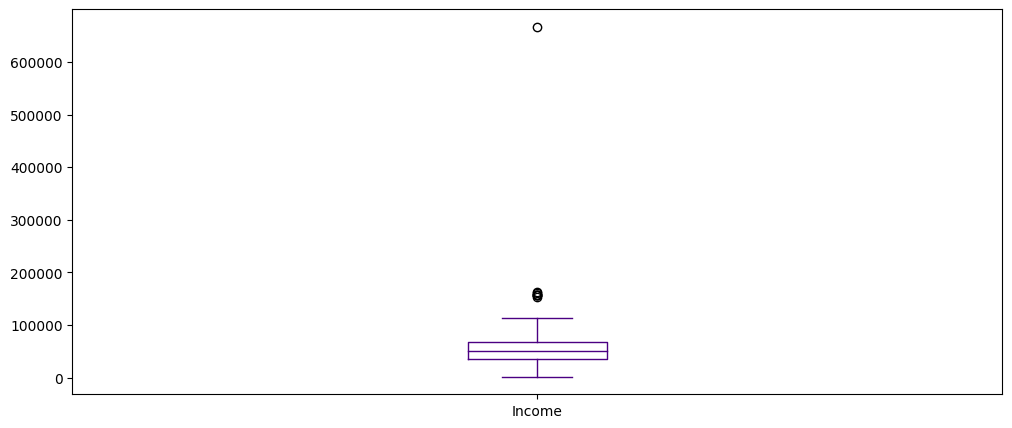

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df["Income"],color = 'indigo')
plt.show()
df["Income"].plot.box(figsize=(12,5),color = 'indigo')
plt.show()

The income column is left skewed as we previously observed, but there are a few outliers that we will address when developing the model.

5."Kidhome,Teenhome" Variable Analysis

In [ ]:
df['Teenhome'].unique()


array([0, 1, 2])

In [ ]:
df['Kidhome'].unique()

array([0, 1, 2])

In [ ]:
# For reduction of the number of dimensions we combine different dataframes into a single column

df['Children'] = df['Kidhome'] + df['Teenhome']

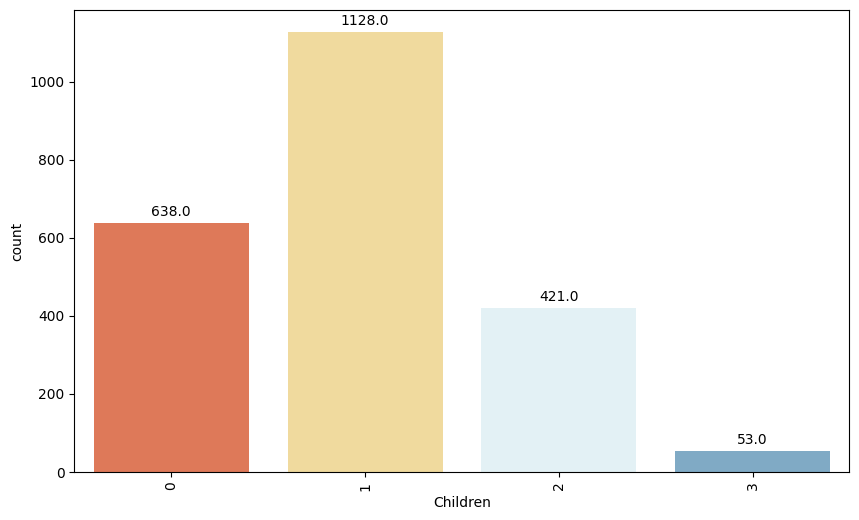

In [ ]:
def uni_V(df, col):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col,palette="RdYlBu")

    # Add labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height}",
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  # Offset for label placement
                    textcoords="offset points",
                    ha='center', va='bottom')  # Horizontal and vertical alignment

    plt.xticks(rotation=90)
    plt.show()

# Assuming df is your DataFrame
uni_V(df, 'Children')

50.35% of Customers in the dataset have 1 child.
28.48% of Customers in the dataset have no children.
18.79% of Customers in the dataset have 2 children.
2.36% of Customers in the dataset have 3 children.

6.Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.

In [ ]:
df[['MntFruits','MntMeatProducts']].head()

,MntFruits,MntMeatProducts
0,88,546
1,1,6
2,49,127
3,4,20
4,43,118


In [ ]:
df['MntFishProducts'].nunique()

182

In [ ]:
df['MntFruits'].nunique()

158

In [ ]:
# For reduction of the number of dimensions we combine different dataframes into a single column

df['Expenditure'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenditure'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenditure, dtype: int64

In [ ]:
df['Expenditure'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenditure, dtype: float64

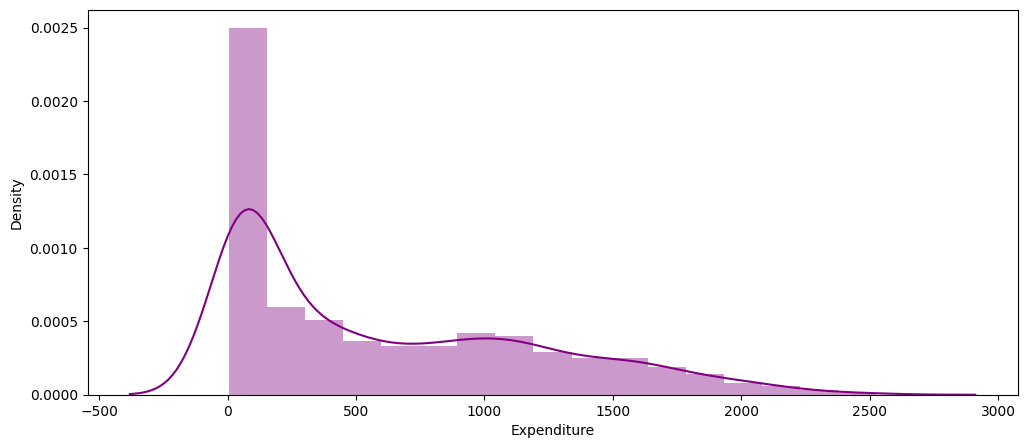

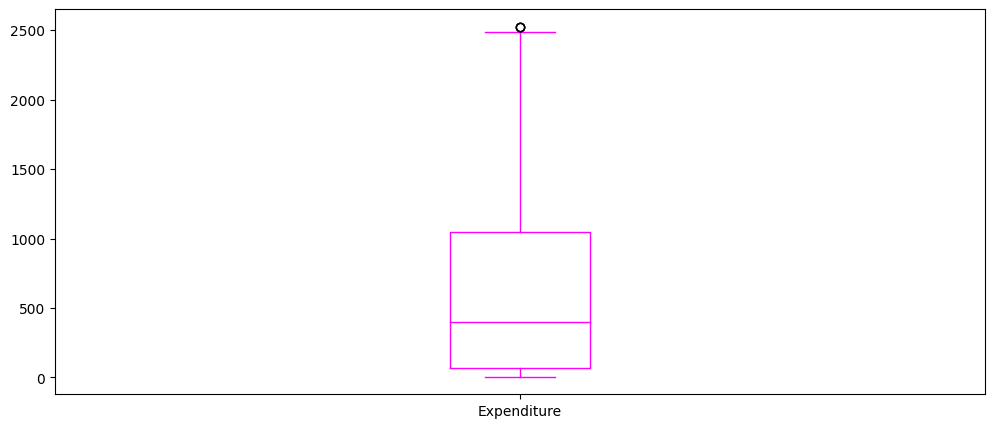

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df["Expenditure"],color = 'purple')
plt.show()
df["Expenditure"].plot.box(figsize=(12,5),color='magenta')
plt.show()

The distribution of Expenditure is uniform

7. "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable Analysis.

In [ ]:
df['AcceptedCmp1'].unique()

array([0, 1])

In [ ]:
df['AcceptedCmp2'].unique()

array([0, 1])

In [ ]:
df['Overall_Accepted_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

Unique categories present in the Overall_Accepted_Cmp: 0    1777
1     325
2      83
3      44
4      11
Name: Overall_Accepted_Cmp, dtype: int64




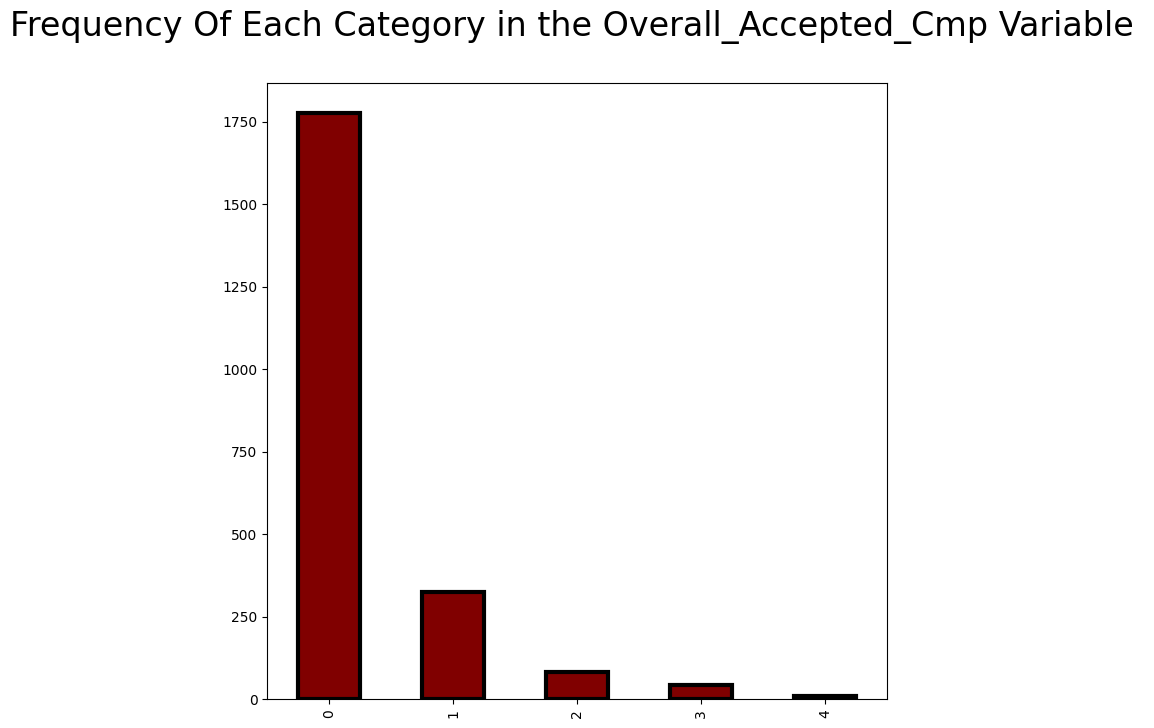

In [ ]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Overall_Accepted_Cmp"
print("Unique categories present in the Overall_Accepted_Cmp:",df['Overall_Accepted_Cmp'].value_counts())
print("\n")

#VISUALIZING THE "Overall_Accepted_Cmp"


plt.figure(figsize=(8,8))
df['Overall_Accepted_Cmp'].value_counts().plot(kind='bar',color = 'Maroon',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Overall_Accepted_Cmp Variable \n",fontsize=24)
plt.show()

79.33% of Customers accepted the offer in the campaign are "0".
14.50% of Customers accepted the offer in the campaign are "1".
3.70% of Customers accepted the offer in the campaign are "2".
1.96% of Customers accepted the offer in the campaign are "3".
0.49% of Customers accepted the offer in the campaign are "4".

8.Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.

In [ ]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25])

In [ ]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22])

In [ ]:
df['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1])

In [ ]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

In [ ]:
df[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [ ]:
df['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

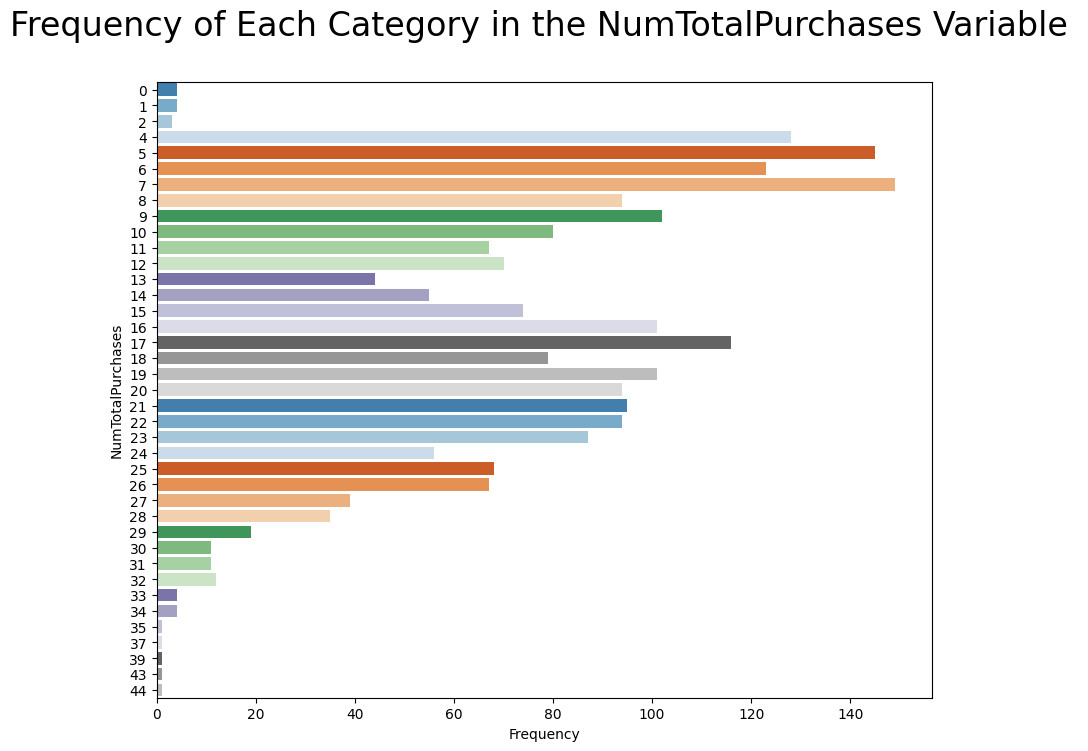

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def uni_V(df, col):
    plt.figure(figsize=(10, 8))  # Adjusting the figure size
    sns.countplot(data=df, y=col, palette='tab20c')  # Using 'tab20c' color palette and y parameter for horizontal orientation

    plt.xlabel("Frequency")  # Label for the x-axis
    plt.ylabel(col)  # Label for the y-axis
    plt.title(f"Frequency of Each Category in the {col} Variable \n", fontsize=24)  # Title for the plot

    plt.show()

# Assuming df is your DataFrame
uni_V(df, 'NumTotalPurchases')


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,0,1617,0,25
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,2,27,0,6
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,776,0,21
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,1,53,0,8
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,1,422,0,19


9. Converting the Year_Birth to customer_Age

In [ ]:
#ADDING A COLUMN "customer_Age" IN THE DATAFRAME....
df['Customer_Age'] = (pd.Timestamp('now').year) - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,0,1617,0,25,67
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,2,27,0,6,70
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,776,0,21,59
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,1,53,0,8,40
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,1,422,0,19,43


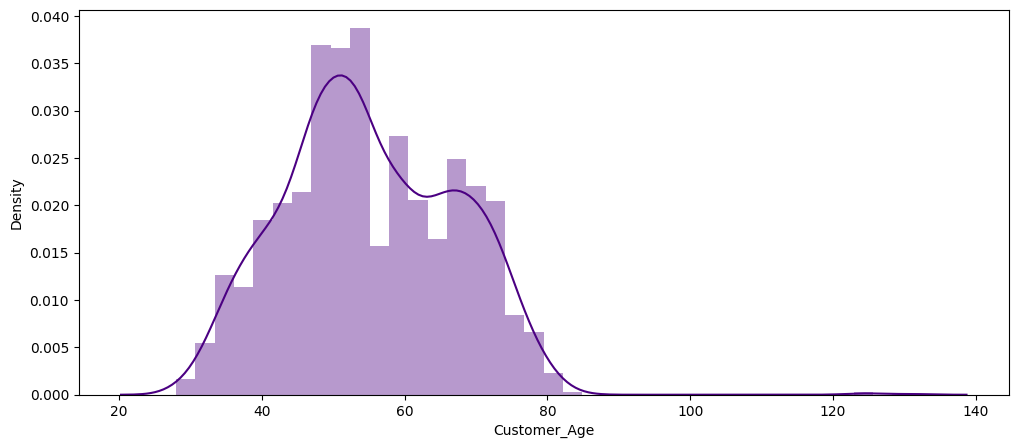

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df["Customer_Age"],color = 'Indigo')
plt.show()

Most of the cutomers we have are in middle age i.e between 35-55

In [ ]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [ ]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,67
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,70
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,59
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,40
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Education             2240 non-null   object        
 1   Marital_Status        2240 non-null   object        
 2   Income                2240 non-null   float64       
 3   Dt_Customer           2240 non-null   datetime64[ns]
 4   Recency               2240 non-null   int64         
 5   Complain              2240 non-null   int64         
 6   Response              2240 non-null   int64         
 7   Children              2240 non-null   int64         
 8   Expenditure           2240 non-null   int64         
 9   Overall_Accepted_Cmp  2240 non-null   int64         
 10  NumTotalPurchases     2240 non-null   int64         
 11  Customer_Age          2240 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 210.1+ K

The following stage involves turning "Dt_Customer" into a feature that shows how many days a customer has been registered in the company's database. To make things simple, we are using the most recent client in the database as the reference for this variable.

Thus to get the values we must check the newest and oldest recorded dates.

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature ("Customer_Shop_Days") of the number of days the customers started to shop in the store relative to the last recorded date

In [ ]:
#Created a feature "Customer_Shop_Days"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_Shop_Days"] = days
df['Customer_Shop_Days'] = df['Customer_Shop_Days'].apply(lambda x:x.days)

In [ ]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,43,161


In [ ]:
df['Customer_Shop_Days'].describe()

count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Customer_Shop_Days, dtype: float64

In [ ]:
df.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [ ]:
df.head()

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161


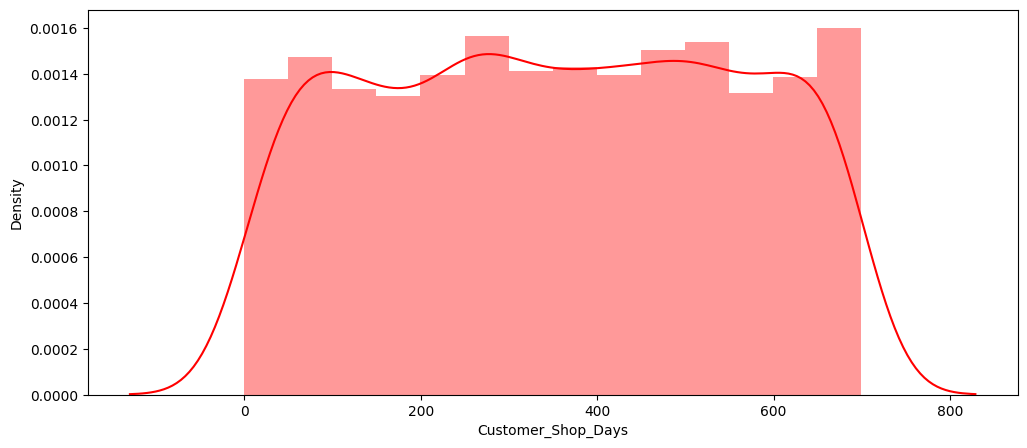

In [ ]:
plt.figure(figsize=(12,5))

sns.distplot(df["Customer_Shop_Days"],color = 'Red')
plt.show()

55 to 650 days are considered to be regular days of high density of customers shopping

In [ ]:
df.head()

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161


In [ ]:
df.shape

(2240, 9)

## Applying Bivariate_ Analysis to make Comparison Between Features and Expenditure

1.Education vs Expenditure

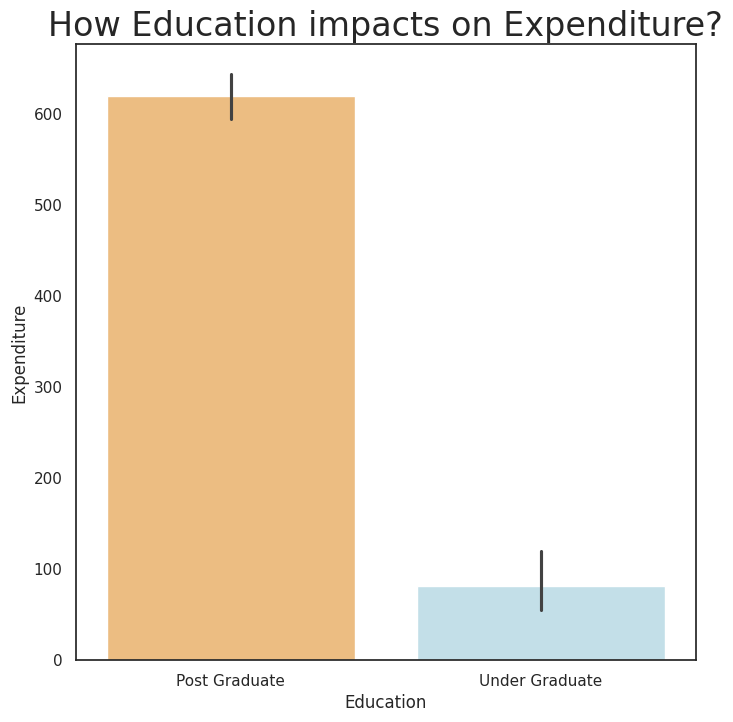

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenditure?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenditure", data=df,palette="RdYlBu")

We observe that the post graduated people spends more than the UG people

2.Marital status vs Expenditure

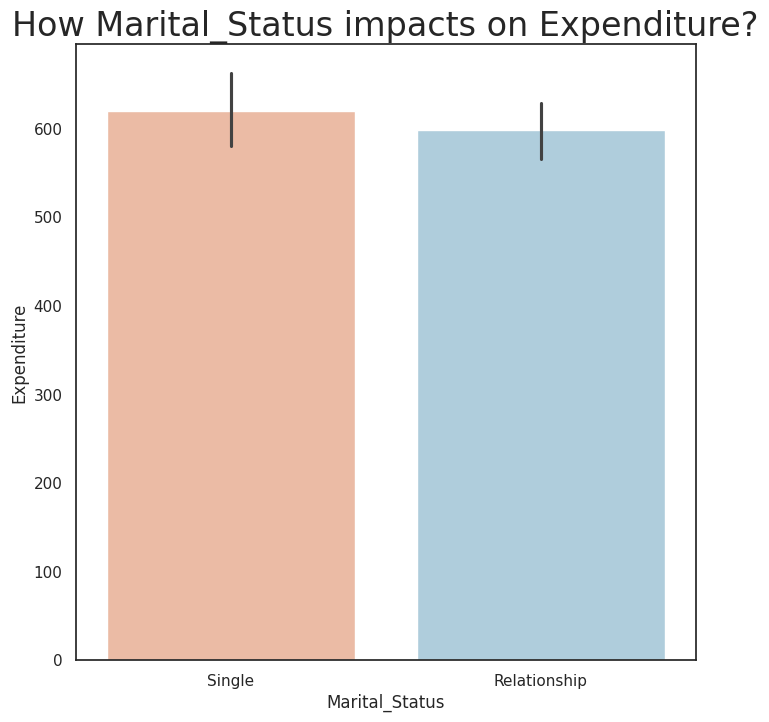

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenditure?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenditure", data=df,palette="RdBu")

We observe that single and married people have the same spendings

3.Children vs Expenditure

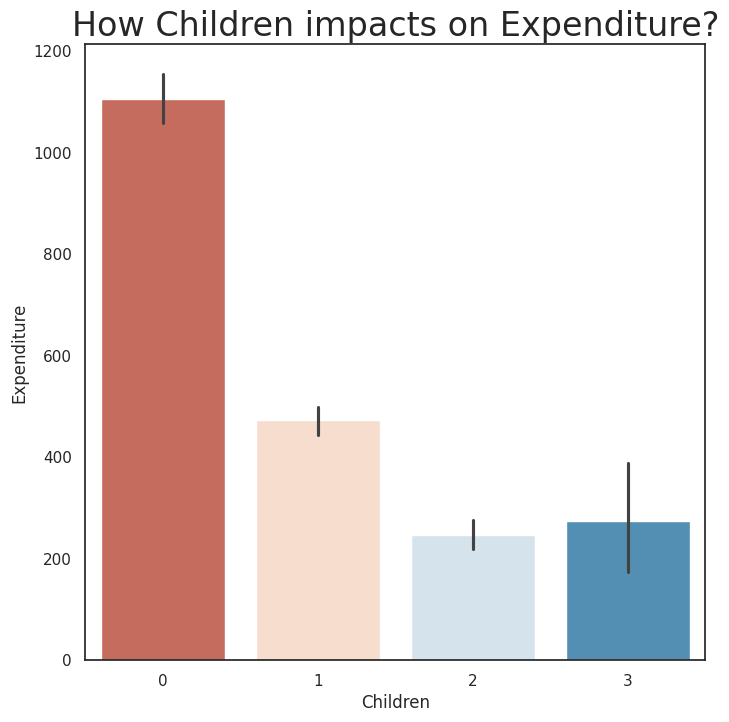

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Children impacts on Expenditure?",fontsize=24)
ax = sns.barplot(x="Children", y="Expenditure", data=df,palette="RdBu")

Here we observe some thing different that parents with 1 kid spends more expenditure than the parents who are having 2 or 3 children

4.Overall_accepted_Cmp vs Expenditure

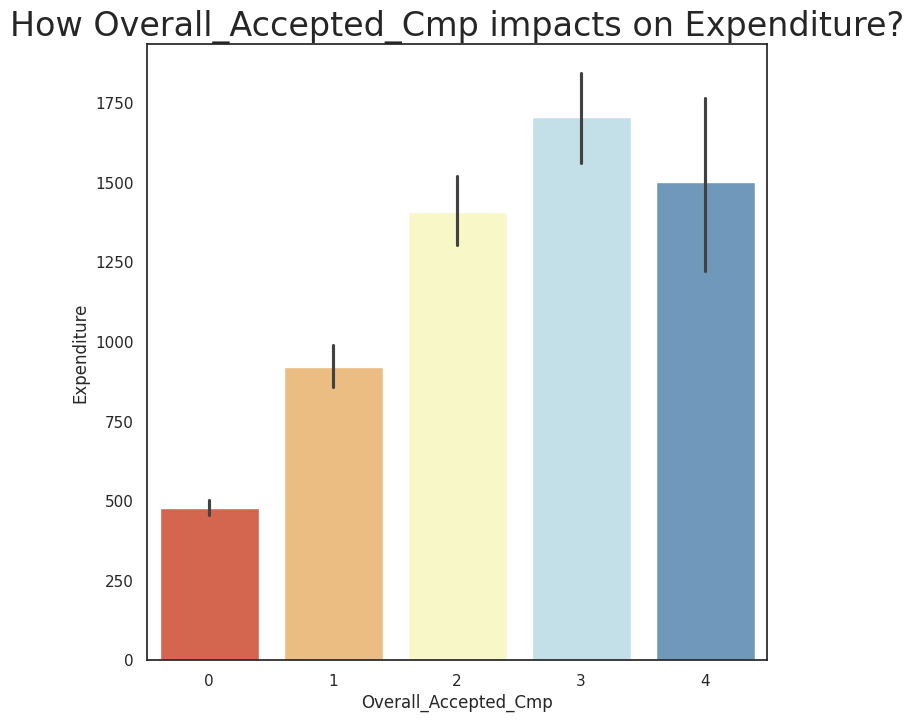

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Overall_Accepted_Cmp impacts on Expenditure?",fontsize=24)
ax = sns.barplot(x="Overall_Accepted_Cmp", y="Expenditure", data=df,palette="RdYlBu")

those who accepeted more campaign have more expenditure

5.NumTotalPurchases vs Expenditure

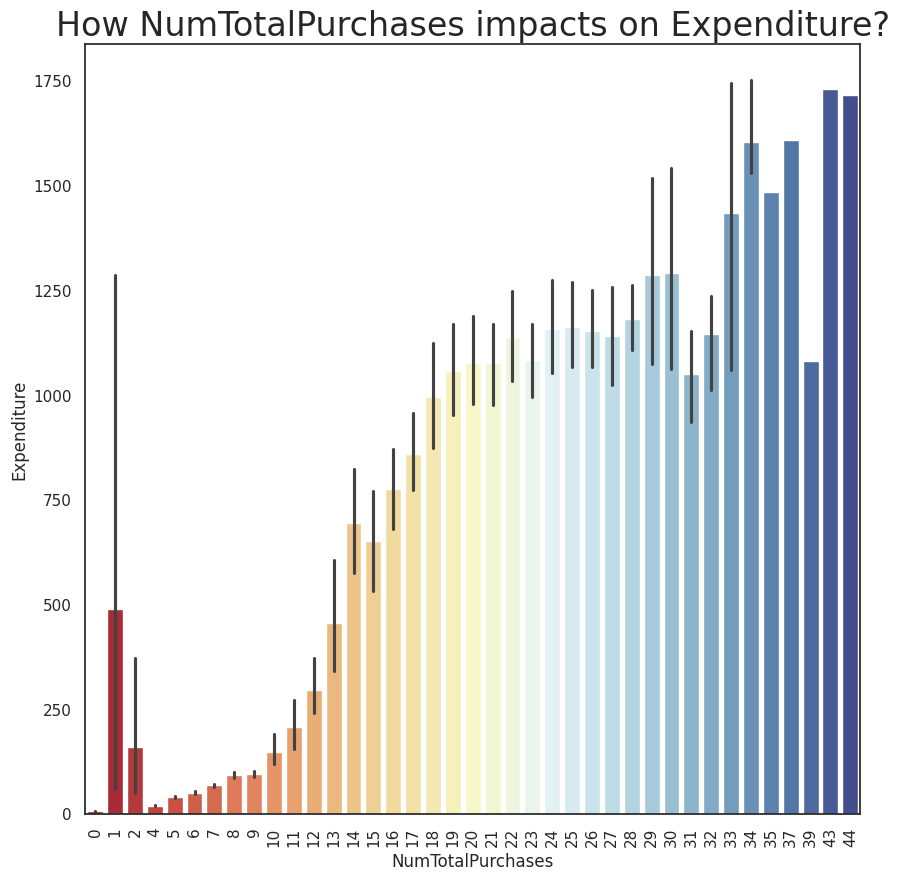

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(10,10))
plt.title("How NumTotalPurchases impacts on Expenditure?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="NumTotalPurchases", y="Expenditure", data=df,palette='RdYlBu')

Those who have more purchases have more Expenditure

6.Day engaged vs Expenditure

In [ ]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Children', 'Expenditure',
       'Overall_Accepted_Cmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_Shop_Days'],
      dtype='object')

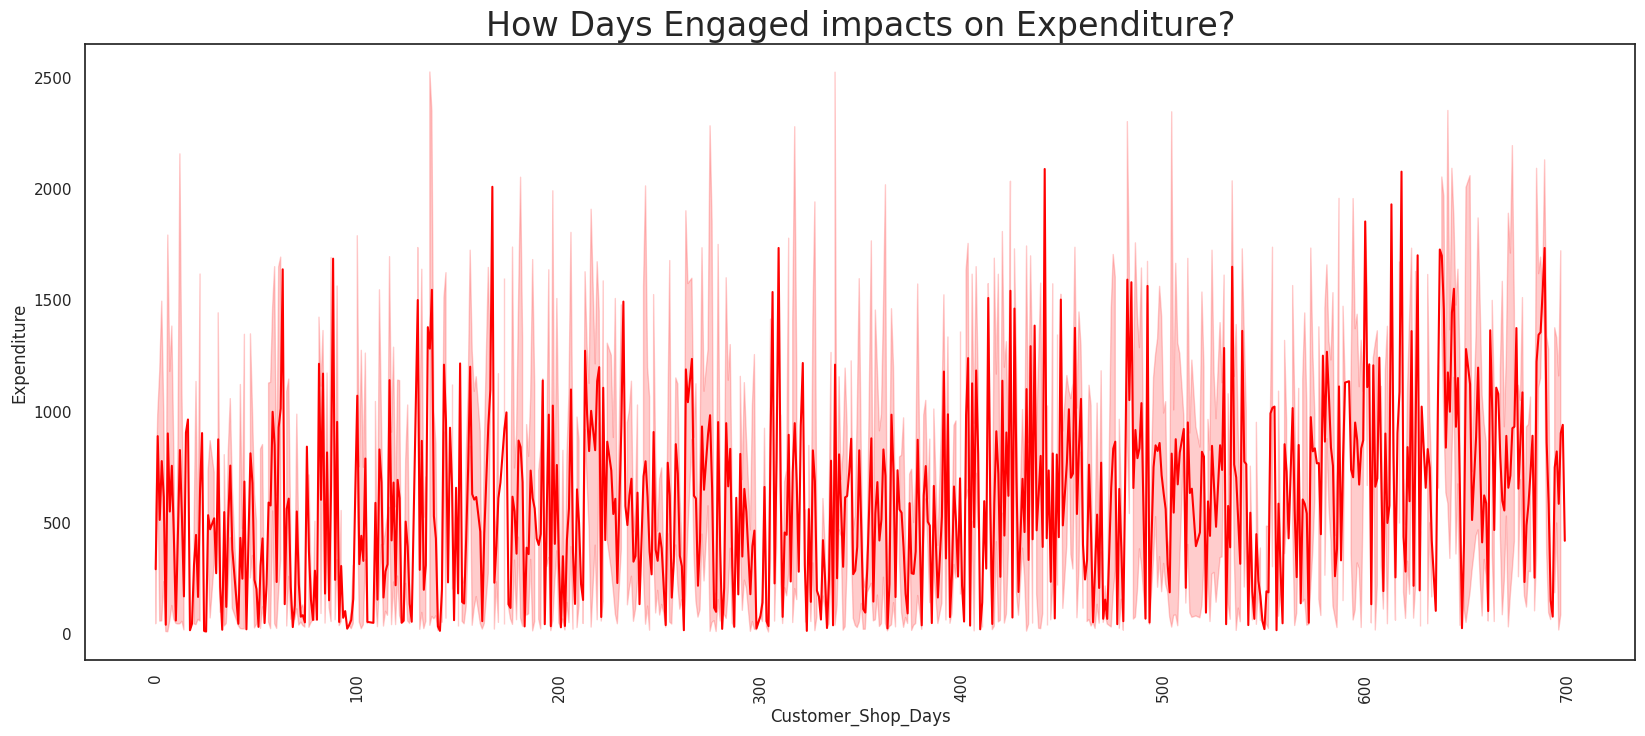

In [ ]:

sns.set_theme(style="white")
plt.figure(figsize=(20, 8))
plt.title("How Days Engaged impacts on Expenditure?", fontsize=24)
plt.xticks(rotation=90)
ax = sns.lineplot(x="Customer_Shop_Days", y="Expenditure", data=df, color="red")
plt.show()


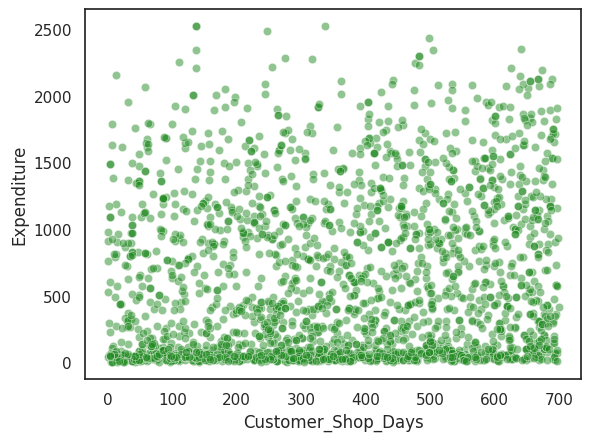

In [ ]:
sns.scatterplot(data=df, x='Customer_Shop_Days', y='Expenditure', color='forestgreen', alpha=0.5)
plt.show()

No relationship between days enagaged vs expenditure

7.Customer Age vs Expenditure

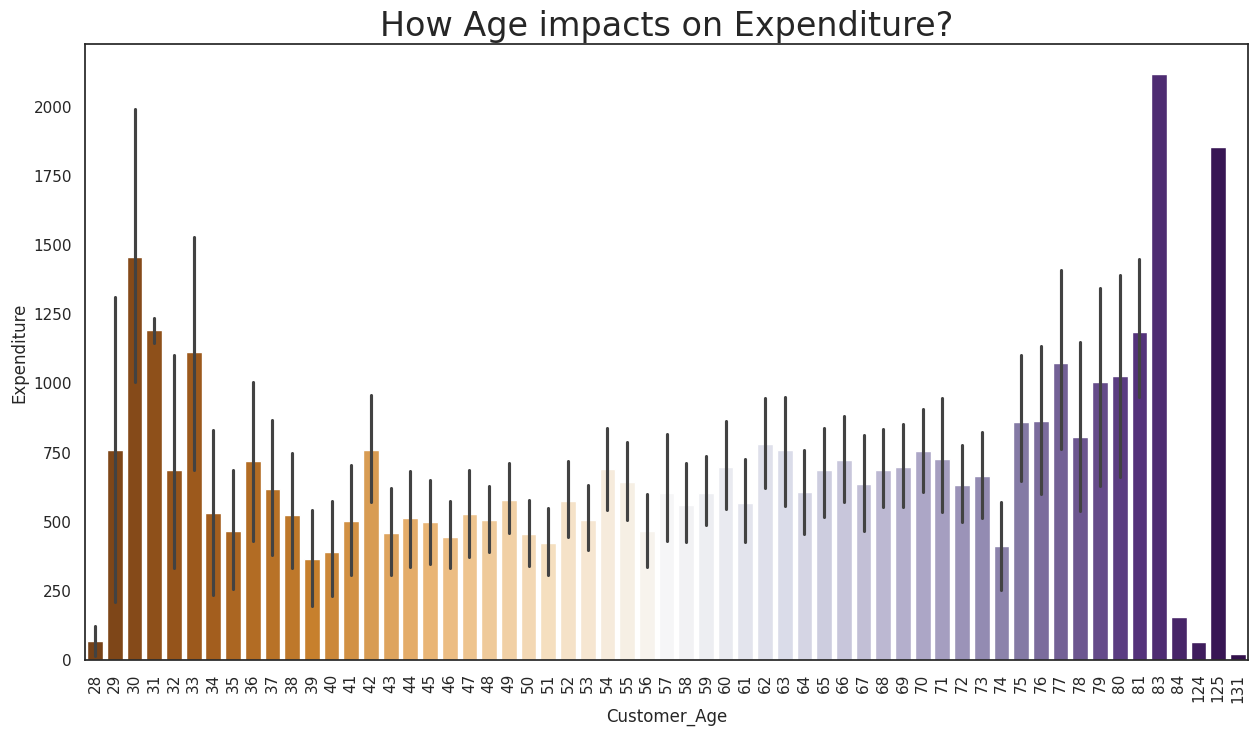

In [ ]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Age impacts on Expenditure?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Customer_Age", y="Expenditure", data=df,palette="PuOr")

plt.show()

People who are in middle age have less expenditure than others

### 5) Eliminating Outliers from the Features

In [ ]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [ ]:
df['Customer_Age'].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Customer_Age, dtype: float64

In [ ]:
df['Expenditure'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenditure, dtype: float64

In [ ]:
df['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

In [ ]:
df.shape

(2240, 9)

In [ ]:
df = df[df['Income'] < 70000]
df = df[df['Customer_Age'] < 90]
df = df[df['Expenditure'] < 1050]
df = df[df['NumTotalPurchases'] < 21.1]

In [ ]:
df.shape

(1360, 9)

In [ ]:
df.head()

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161
6,Post Graduate,Single,55635.0,1,590,0,21,53,593
7,Post Graduate,Relationship,33454.0,1,169,0,10,39,417


In [ ]:
df.dtypes

Education                object
Marital_Status           object
Income                  float64
Children                  int64
Expenditure               int64
Overall_Accepted_Cmp      int64
NumTotalPurchases         int64
Customer_Age              int64
Customer_Shop_Days        int64
dtype: object

### 6) Finding the correlation:-

Income is more positively correlated to Expenditure and Number of purchases

Expenditure is positively correlated to Income and Number of pur chases and negitively correlated with Children

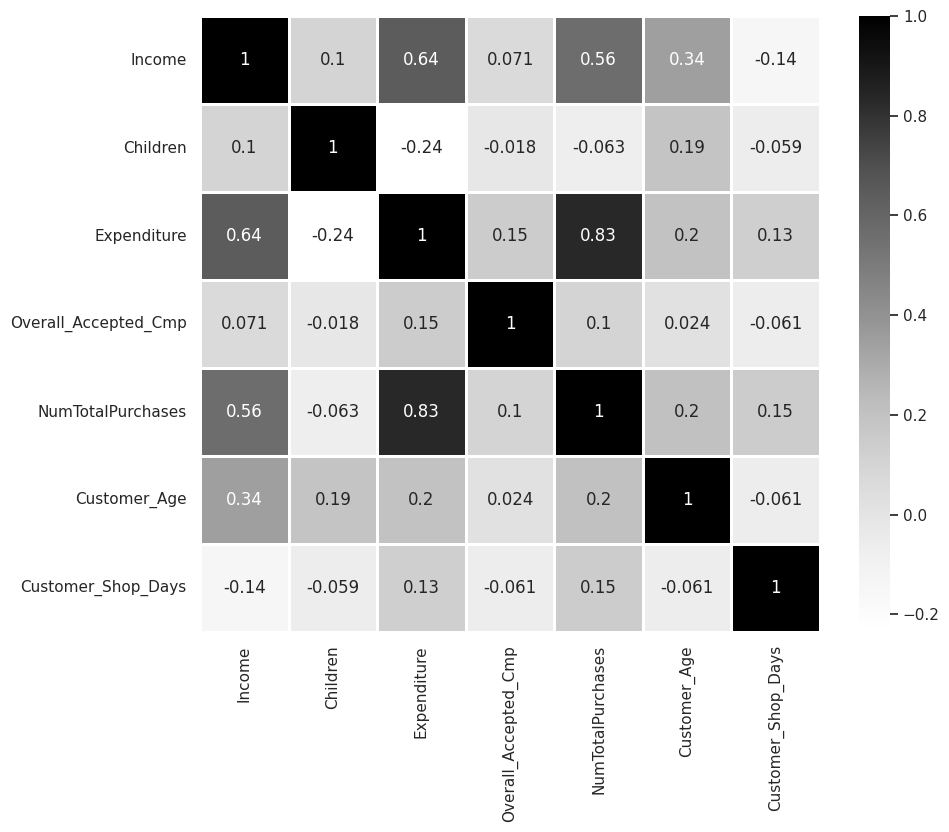

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap with the numerical DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greys', linewidths=1)
plt.show()

## Standaradizing the Data

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [ ]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Children', 'Expenditure',
       'Overall_Accepted_Cmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_Shop_Days'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_scale = ['Income', 'Children', 'Expenditure',
       'Overall_Accepted_Cmp', 'NumTotalPurchases', 'Customer_Age', 'Customer_Shop_Days']

df[col_scale] = scaler.fit_transform(df[col_scale])

In [ ]:
df.head()

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
1,0,1,0.502071,1.174968,-0.780987,-0.33285,-0.829901,1.420330,-1.107939
3,0,0,-0.882430,-0.263337,-0.663938,-0.33285,-0.430938,-1.245116,-0.977283
4,0,0,1.341923,-0.263337,0.997256,-0.33285,1.763356,-0.978571,-0.866728
6,0,1,1.155101,-0.263337,1.753572,-0.33285,2.162318,-0.090089,1.304166
7,0,0,-0.403920,-0.263337,-0.141720,-0.33285,-0.031976,-1.333964,0.419728


# Model Building

K-Means

In [ ]:
X_0 = df.copy()

In [ ]:
from sklearn.cluster import KMeans

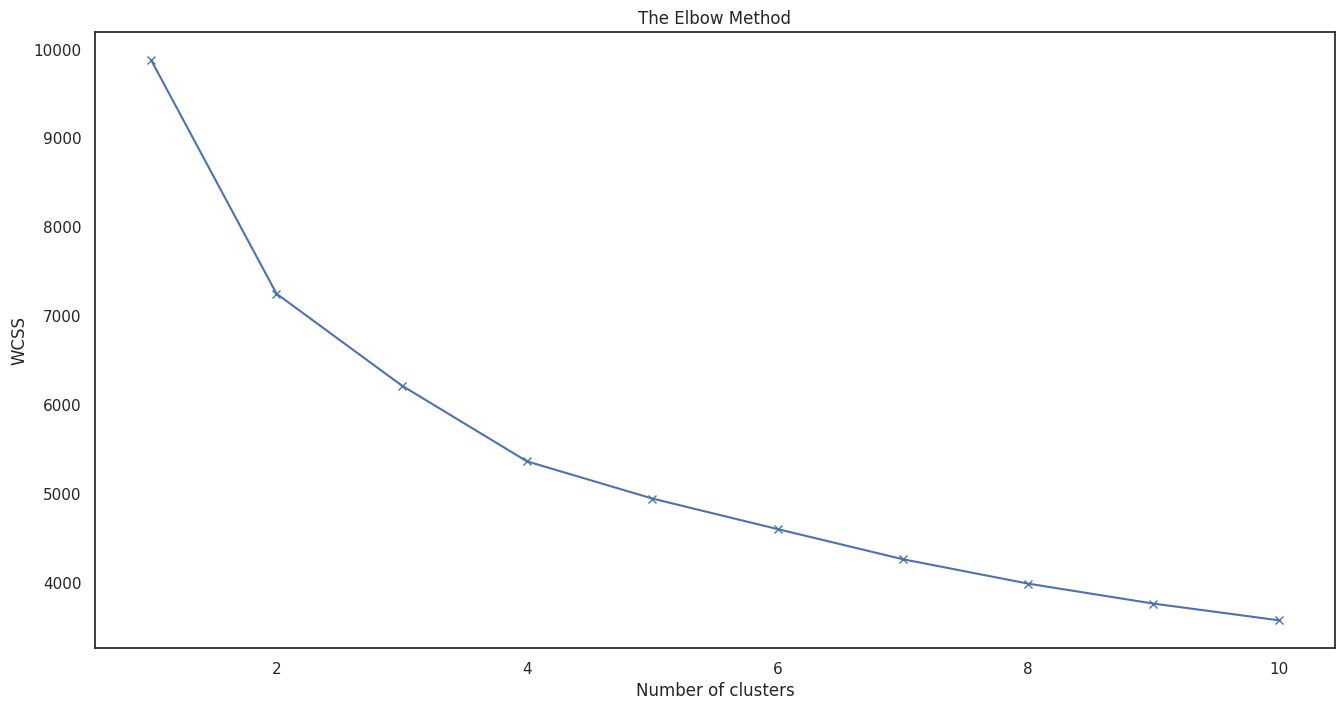

In [ ]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_0)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can understand from the plot that cluster = 2 is the best...

In [ ]:
kmeansmodel = KMeans(n_clusters = 5, init='kmeans++', random_state=0)

In [ ]:
# Training a predicting using K-Means Algorithm.
kmeans=KMeans(n_clusters=2, random_state=42).fit(X_0)
pred=kmeans.predict(X_0)
# Training a predicting using K-Means Algorithm.
X_0['cluster_Kmeans'] = pred + 1

In [ ]:
Silhouette = silhouette_score(X_0,pred)
print('Silhouette Score of Kmeans Clustering:', Silhouette)

Silhouette Score of Kmeans Clustering: 0.29795419202051854


In [ ]:
import matplotlib.pyplot as plt

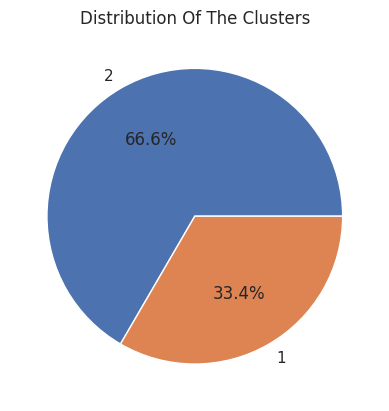

In [ ]:
cluster_counts = X_0["cluster_Kmeans"].value_counts()


plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title("Distribution Of The Clusters")
plt.show()

<Axes: xlabel='Expenditure', ylabel='Income'>

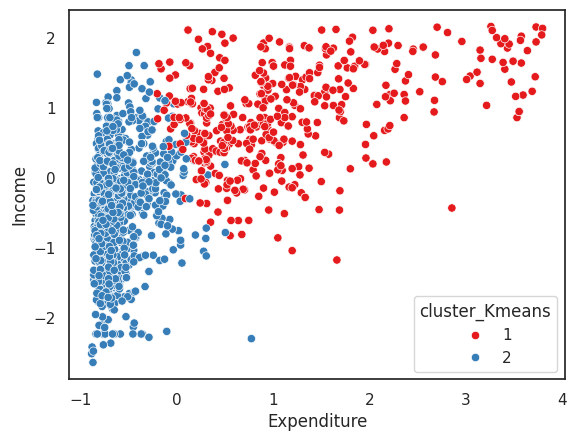

In [ ]:
sns.scatterplot(x = X_0['Expenditure'], y = X_0['Income'],hue=X_0['cluster_Kmeans'],palette='Set1')

### pca with Agglomerative clustering

In [ ]:
df.head()

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
1,0,1,0.502071,1.174968,-0.780987,-0.33285,-0.829901,1.420330,-1.107939
3,0,0,-0.882430,-0.263337,-0.663938,-0.33285,-0.430938,-1.245116,-0.977283
4,0,0,1.341923,-0.263337,0.997256,-0.33285,1.763356,-0.978571,-0.866728
6,0,1,1.155101,-0.263337,1.753572,-0.33285,2.162318,-0.090089,1.304166
7,0,0,-0.403920,-0.263337,-0.141720,-0.33285,-0.031976,-1.333964,0.419728


In [ ]:
X_1 = df.copy()

In [ ]:
X_1.head()

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
1,0,1,0.502071,1.174968,-0.780987,-0.33285,-0.829901,1.420330,-1.107939
3,0,0,-0.882430,-0.263337,-0.663938,-0.33285,-0.430938,-1.245116,-0.977283
4,0,0,1.341923,-0.263337,0.997256,-0.33285,1.763356,-0.978571,-0.866728
6,0,1,1.155101,-0.263337,1.753572,-0.33285,2.162318,-0.090089,1.304166
7,0,0,-0.403920,-0.263337,-0.141720,-0.33285,-0.031976,-1.333964,0.419728


In [ ]:
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(X_1)
PCA_ds = pd.DataFrame(pca.transform(X_1), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1360.0,-2.089832e-17,1.588388,-3.005209,-1.235882,-0.521535,1.180098,4.590092
col2,1360.0,-1.175530e-17,1.152997,-3.272392,-0.733134,0.029566,0.795936,3.446836
col3,1360.0,4.571507e-18,1.023607,-2.157402,-0.712448,-0.120266,0.476469,4.962448


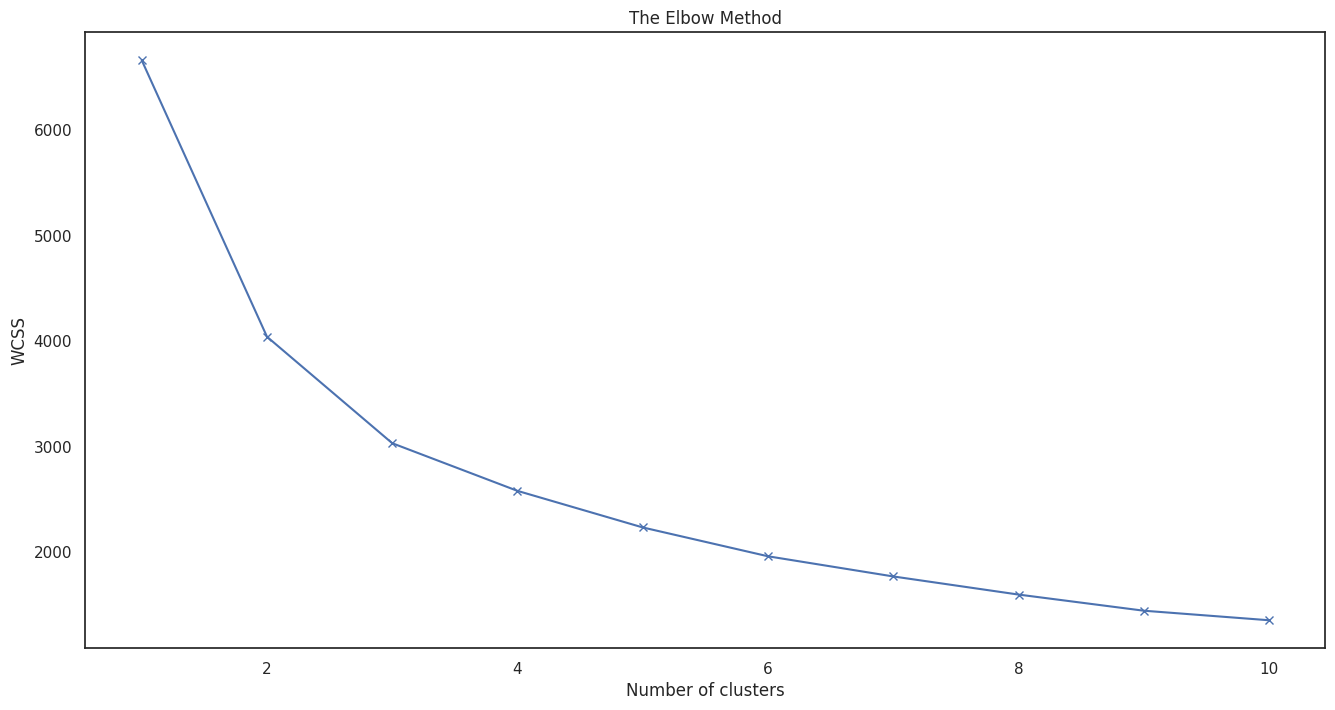

In [ ]:

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

WCSS is the sum of the squared distance between each point and the centroid in a cluster.

wcss values is more less for k=2 here...so we take k=2

In [ ]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
X_1["Cluster_Agglo"]= yhat_AC + 1

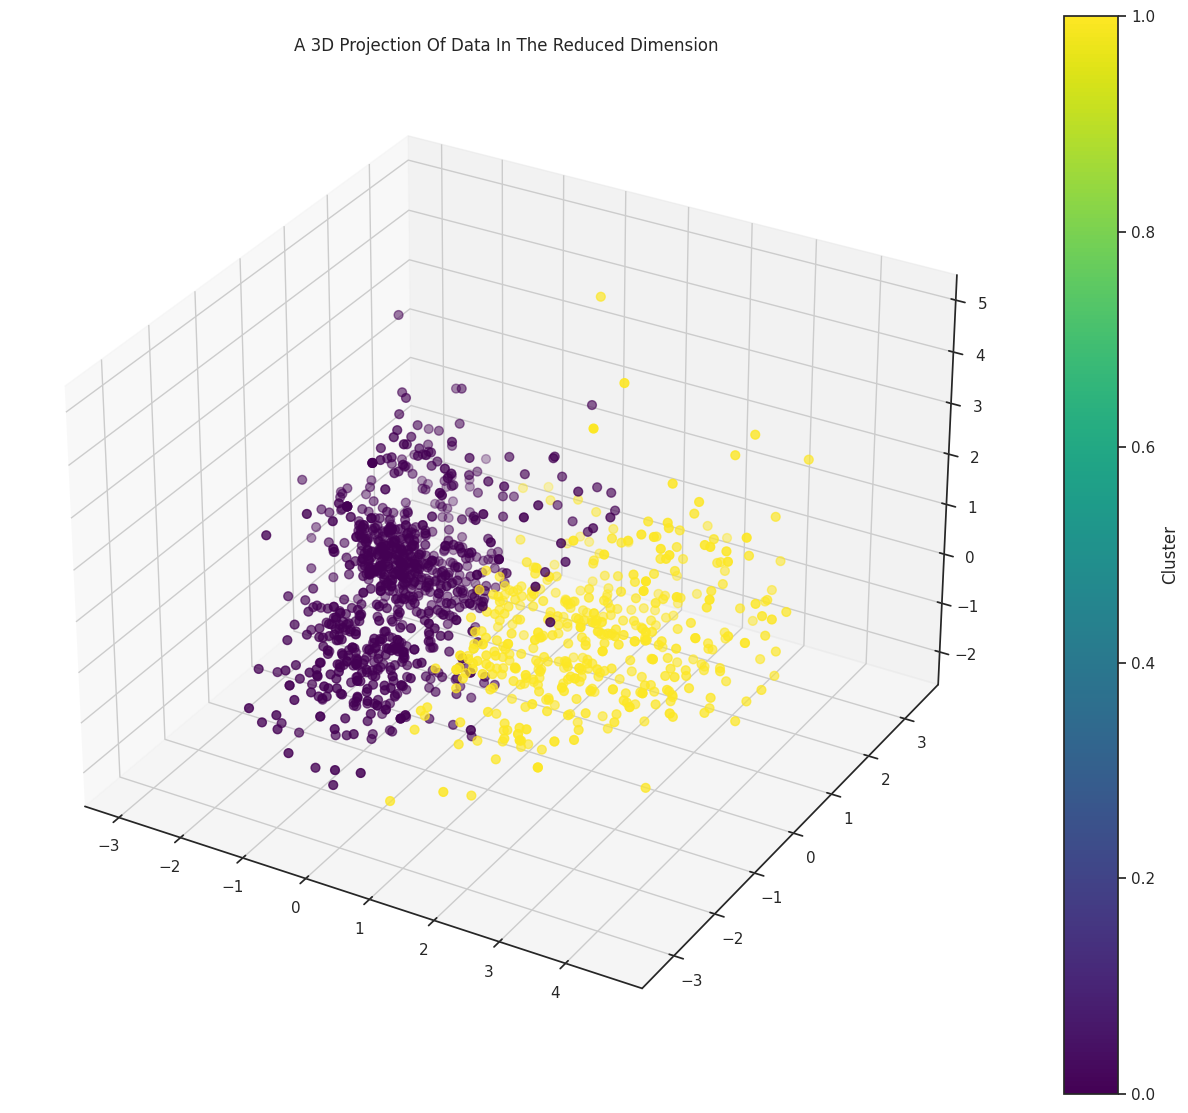

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
cluster_labels = PCA_ds["Clusters"]
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, s=40, c=cluster_labels, cmap='viridis', marker='o')
ax.set_title("The Plot Of The Clusters")
colorbar = fig.colorbar(scatter)
colorbar.set_label('Cluster')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
X_1

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days,Cluster_Agglo
1,0,1,0.502071,1.174968,-0.780987,-0.332850,-0.829901,1.420330,-1.107939,1
3,0,0,-0.882430,-0.263337,-0.663938,-0.332850,-0.430938,-1.245116,-0.977283,1
4,0,0,1.341923,-0.263337,0.997256,-0.332850,1.763356,-0.978571,-0.866728,2
6,0,1,1.155101,-0.263337,1.753572,-0.332850,2.162318,-0.090089,1.304166,2
7,0,0,-0.403920,-0.263337,-0.141720,-0.332850,-0.031976,-1.333964,0.419728,1
...,...,...,...,...,...,...,...,...,...,...
2229,0,0,-1.037903,1.174968,-0.677444,-0.332850,-0.630419,-0.178938,-1.464729,1
2230,0,1,-1.981286,-0.263337,-0.524380,2.789053,-0.231457,-1.245116,0.686064,1
2232,0,1,-0.870481,-1.701642,-0.803496,-0.332850,-1.228863,-1.422812,1.746385,1
2234,0,0,-0.335953,-0.263337,-0.767481,-0.332850,-1.228863,-0.356634,0.148366,1


In [ ]:
Silhouette = silhouette_score(PCA_ds,yhat_AC)
print('Silhouette Score of Agglomerative clustering:', Silhouette)

Silhouette Score of Agglomerative clustering: 0.3957297540365493


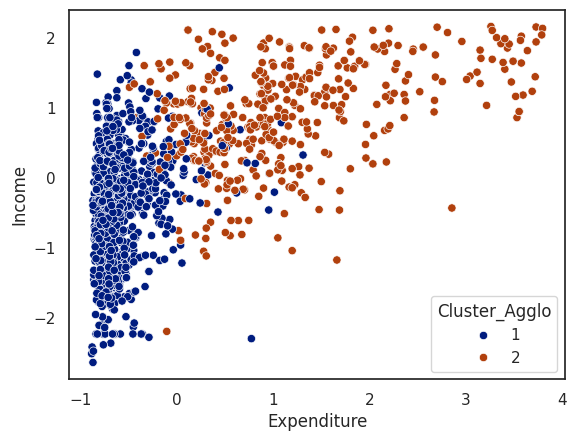

In [ ]:
sns.scatterplot(x=X_1['Expenditure'], y=X_1['Income'], hue=X_1['Cluster_Agglo'], palette='dark')
plt.xlabel("Expenditure")
plt.ylabel("Income")
plt.show()


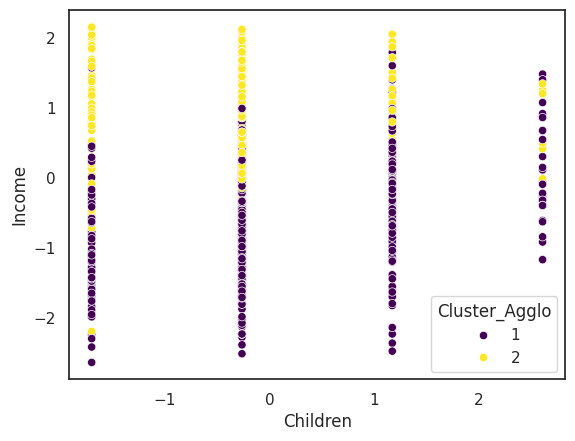

In [ ]:
sns.scatterplot(x=X_1['Children'], y=X_1['Income'], hue=X_1['Cluster_Agglo'], palette='viridis', hue_order=['medium'])
plt.xlabel("Children")
plt.ylabel("Income")
plt.show()


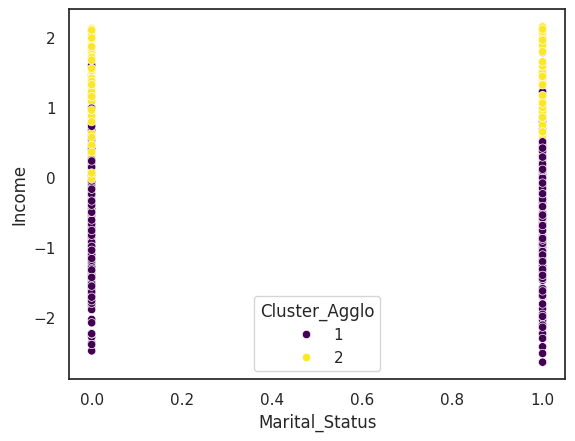

In [ ]:
sns.scatterplot(x = X_1['Marital_Status'],y = X_1['Income'],hue=X_1['Cluster_Agglo'],palette='viridis', hue_order=['medium'])
plt.xlabel("Marital_Status")
plt.ylabel("Income")
plt.show()


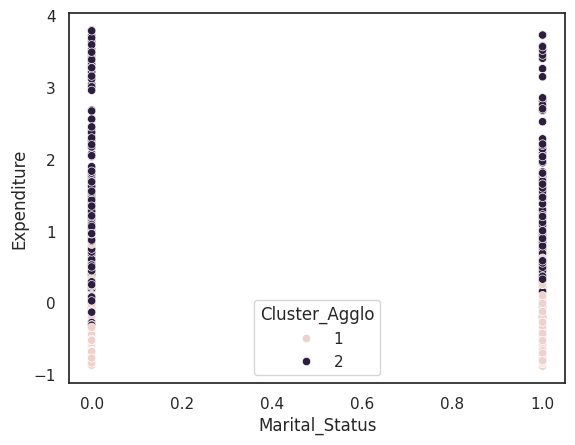

In [ ]:
sns.scatterplot(x = X_1['Marital_Status'],y = X_1['Expenditure'],hue=X_1['Cluster_Agglo'])
plt.xlabel("Marital_Status")
plt.ylabel("Expenditure")
plt.show()


In [ ]:
cluster_counts = X_1["Cluster_Agglo"].value_counts()

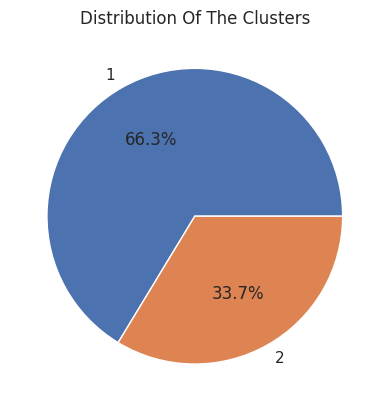

In [ ]:
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title("Distribution Of The Clusters")
plt.show()

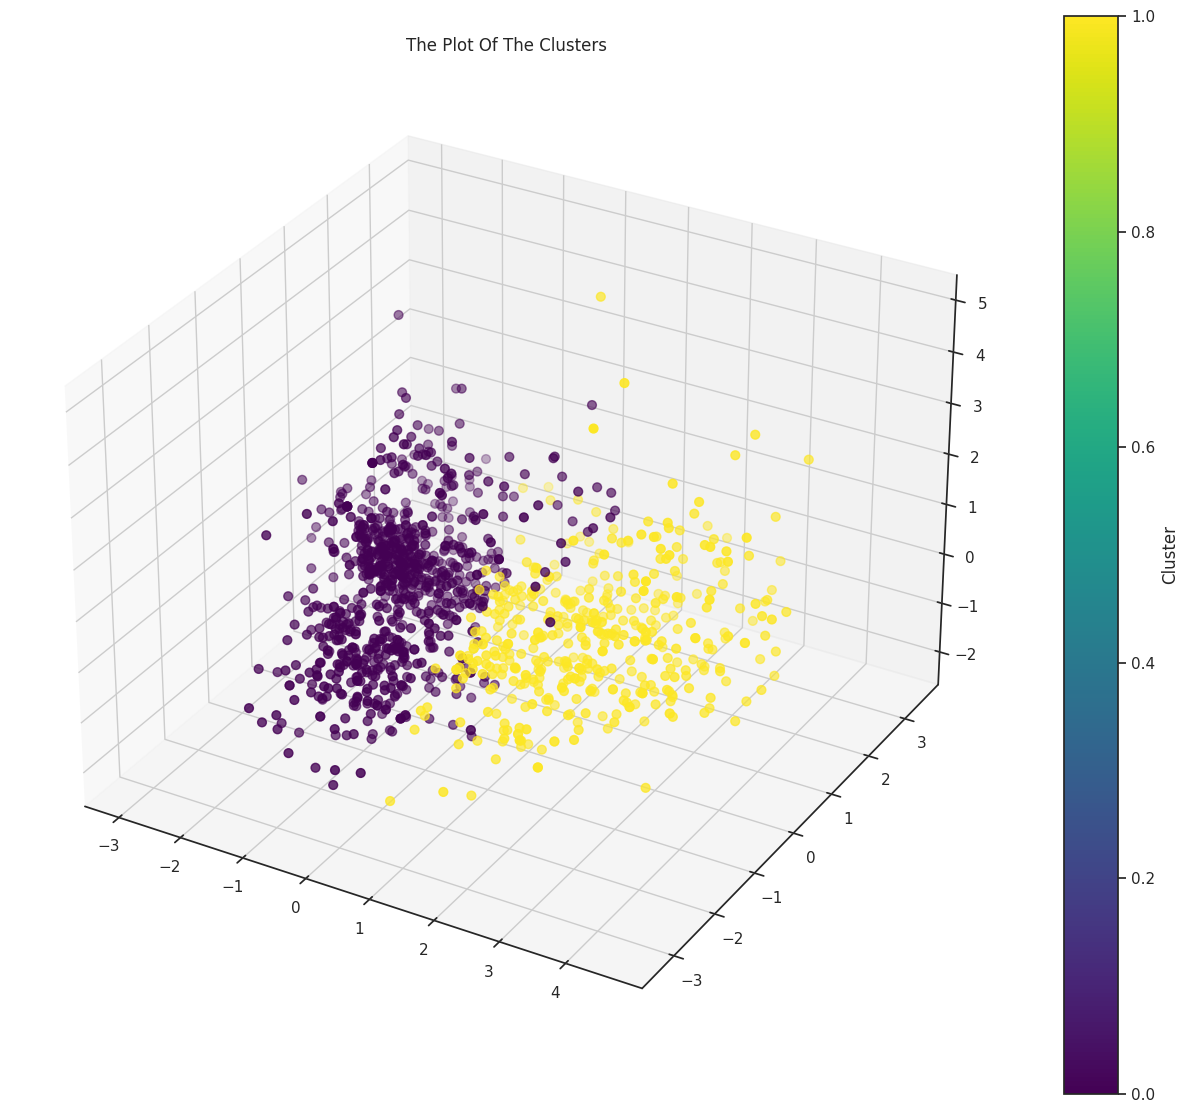

In [ ]:
#Plotting the clusters
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]
cluster_labels = PCA_ds["Clusters"]
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, s=40, c=cluster_labels, cmap='viridis', marker='o')
ax.set_title("The Plot Of The Clusters")
colorbar = fig.colorbar(scatter)
colorbar.set_label('Cluster')
plt.show()

### Cluster 1:
People with less expenses

people who are married and parents of more than 3 kids

people which low income


-------------------------------------------------------------------------
-------------------------------------------------------------------------

### Cluster 2:
people with more expenses

people who are single or parents who have less than 3 kids

people with high income

Age is not the criteria but it is observed to some extent that people who are older fall in this group


So, the customers falling in cluster 2 likes to spend more...so the Firm's can target people falling in cluster 2 for the sale of their Products....

In [ ]:
X_1

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days,Cluster_Agglo
1,0,1,0.502071,1.174968,-0.780987,-0.332850,-0.829901,1.420330,-1.107939,1
3,0,0,-0.882430,-0.263337,-0.663938,-0.332850,-0.430938,-1.245116,-0.977283,1
4,0,0,1.341923,-0.263337,0.997256,-0.332850,1.763356,-0.978571,-0.866728,2
6,0,1,1.155101,-0.263337,1.753572,-0.332850,2.162318,-0.090089,1.304166,2
7,0,0,-0.403920,-0.263337,-0.141720,-0.332850,-0.031976,-1.333964,0.419728,1
...,...,...,...,...,...,...,...,...,...,...
2229,0,0,-1.037903,1.174968,-0.677444,-0.332850,-0.630419,-0.178938,-1.464729,1
2230,0,1,-1.981286,-0.263337,-0.524380,2.789053,-0.231457,-1.245116,0.686064,1
2232,0,1,-0.870481,-1.701642,-0.803496,-0.332850,-1.228863,-1.422812,1.746385,1
2234,0,0,-0.335953,-0.263337,-0.767481,-0.332850,-1.228863,-0.356634,0.148366,1


In [ ]:
X_0

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days,cluster_Kmeans
1,0,1,0.502071,1.174968,-0.780987,-0.332850,-0.829901,1.420330,-1.107939,2
3,0,0,-0.882430,-0.263337,-0.663938,-0.332850,-0.430938,-1.245116,-0.977283,2
4,0,0,1.341923,-0.263337,0.997256,-0.332850,1.763356,-0.978571,-0.866728,1
6,0,1,1.155101,-0.263337,1.753572,-0.332850,2.162318,-0.090089,1.304166,1
7,0,0,-0.403920,-0.263337,-0.141720,-0.332850,-0.031976,-1.333964,0.419728,2
...,...,...,...,...,...,...,...,...,...,...
2229,0,0,-1.037903,1.174968,-0.677444,-0.332850,-0.630419,-0.178938,-1.464729,2
2230,0,1,-1.981286,-0.263337,-0.524380,2.789053,-0.231457,-1.245116,0.686064,2
2232,0,1,-0.870481,-1.701642,-0.803496,-0.332850,-1.228863,-1.422812,1.746385,2
2234,0,0,-0.335953,-0.263337,-0.767481,-0.332850,-1.228863,-0.356634,0.148366,2


# Classification

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
x = X_0.drop(columns=['cluster_Kmeans'])
y = X_0['cluster_Kmeans']

In [ ]:
x

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days
1,0,1,0.502071,1.174968,-0.780987,-0.332850,-0.829901,1.420330,-1.107939
3,0,0,-0.882430,-0.263337,-0.663938,-0.332850,-0.430938,-1.245116,-0.977283
4,0,0,1.341923,-0.263337,0.997256,-0.332850,1.763356,-0.978571,-0.866728
6,0,1,1.155101,-0.263337,1.753572,-0.332850,2.162318,-0.090089,1.304166
7,0,0,-0.403920,-0.263337,-0.141720,-0.332850,-0.031976,-1.333964,0.419728
...,...,...,...,...,...,...,...,...,...
2229,0,0,-1.037903,1.174968,-0.677444,-0.332850,-0.630419,-0.178938,-1.464729
2230,0,1,-1.981286,-0.263337,-0.524380,2.789053,-0.231457,-1.245116,0.686064
2232,0,1,-0.870481,-1.701642,-0.803496,-0.332850,-1.228863,-1.422812,1.746385
2234,0,0,-0.335953,-0.263337,-0.767481,-0.332850,-1.228863,-0.356634,0.148366


In [ ]:
y

1       2
3       2
4       1
6       1
7       2
       ..
2229    2
2230    2
2232    2
2234    2
2239    1
Name: cluster_Kmeans, Length: 1360, dtype: int32

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
model.feature_importances_

array([0.        , 0.        , 0.03478282, 0.        , 0.94684477,
       0.        , 0.        , 0.01837242, 0.        ])

In [ ]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

2    177
1     95
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,1,2
cluster_Kmeans,,
1,94,8
2,1,169


In [ ]:
np.mean(preds==y_test)

0.9669117647058824

In [ ]:
model = DecisionTreeClassifier(criterion='gini',max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred=model.predict(X_test)

In [ ]:
pd.Series(pred).value_counts()

2    174
1     98
dtype: int64

In [ ]:
np.mean(pred==y_test)

0.9705882352941176

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(criterion = 'entropy',max_depth = 5,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
model.feature_importances_

array([0.00127239, 0.00127056, 0.16621451, 0.01212548, 0.48634737,
       0.00210834, 0.29307648, 0.02490581, 0.01267906])

In [ ]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

2    173
1     99
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,1,2
cluster_Kmeans,,
1,98,4
2,1,169


In [ ]:
np.mean(preds==y_test)

0.9816176470588235

In [ ]:
model = RandomForestClassifier(criterion = 'gini',max_depth = 6,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [ ]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

2    172
1    100
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,1,2
cluster_Kmeans,,
1,98,4
2,2,168


In [ ]:
np.mean(preds==y_test)

0.9779411764705882

# Decision Tree Clasification

In [ ]:
X_1

,Education,Marital_Status,Income,Children,Expenditure,Overall_Accepted_Cmp,NumTotalPurchases,Customer_Age,Customer_Shop_Days,Cluster_Agglo
1,0,1,0.502071,1.174968,-0.780987,-0.332850,-0.829901,1.420330,-1.107939,1
3,0,0,-0.882430,-0.263337,-0.663938,-0.332850,-0.430938,-1.245116,-0.977283,1
4,0,0,1.341923,-0.263337,0.997256,-0.332850,1.763356,-0.978571,-0.866728,2
6,0,1,1.155101,-0.263337,1.753572,-0.332850,2.162318,-0.090089,1.304166,2
7,0,0,-0.403920,-0.263337,-0.141720,-0.332850,-0.031976,-1.333964,0.419728,1
...,...,...,...,...,...,...,...,...,...,...
2229,0,0,-1.037903,1.174968,-0.677444,-0.332850,-0.630419,-0.178938,-1.464729,1
2230,0,1,-1.981286,-0.263337,-0.524380,2.789053,-0.231457,-1.245116,0.686064,1
2232,0,1,-0.870481,-1.701642,-0.803496,-0.332850,-1.228863,-1.422812,1.746385,1
2234,0,0,-0.335953,-0.263337,-0.767481,-0.332850,-1.228863,-0.356634,0.148366,1


In [ ]:
x = X_1.drop(columns=['Cluster_Agglo'])
y = X_1['Cluster_Agglo']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
model.feature_importances_

array([0.        , 0.        , 0.06408686, 0.        , 0.8776242 ,
       0.04864861, 0.        , 0.        , 0.00964033])

In [ ]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

1    258
2    150
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,1,2
Cluster_Agglo,,
1,249,8
2,9,142


In [ ]:
np.mean(preds==y_test)

0.9583333333333334

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
model.feature_importances_

array([0.        , 0.        , 0.02284511, 0.        , 0.95125245,
       0.02590243, 0.        , 0.        , 0.        ])

In [ ]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

1    260
2    148
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,1,2
Cluster_Agglo,,
1,252,5
2,8,143


In [ ]:
np.mean(preds==y_test)

0.9681372549019608

# Random Forest Classification

In [ ]:
model = RandomForestClassifier(criterion = 'gini',max_depth = 6,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [ ]:
model.feature_importances_

array([0.00067291, 0.00361528, 0.17623429, 0.01403654, 0.42914569,
       0.02628492, 0.28803561, 0.03231245, 0.02966231])

In [ ]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

1    258
2    150
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,1,2
Cluster_Agglo,,
1,253,4
2,5,146


In [ ]:
np.mean(preds==y_test)

0.9779411764705882

In [ ]:
model = RandomForestClassifier(criterion = 'entropy',max_depth = 6,random_state=42)
final_pipeline=model.fit(X_train,y_train)

In [ ]:
final_pipeline.feature_importances_

array([0.00135737, 0.00315626, 0.17294667, 0.01487304, 0.43737506,
       0.02780933, 0.27162847, 0.03622083, 0.03463297])

In [ ]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

1    254
2    154
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,1,2
Cluster_Agglo,,
1,249,8
2,5,146


In [ ]:
np.mean(preds==y_test)

0.9681372549019608

In [ ]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = RandomForestClassifier(criterion='entropy', max_depth= max_depth, random_state= 42)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [ ]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.945378,0.958333
1,2,0.951681,0.953431
2,3,0.954832,0.955882
3,4,0.965336,0.960784
4,5,0.980042,0.970588
5,6,0.992647,0.968137
6,7,0.998950,0.980392
7,8,1.000000,0.985294
8,9,1.000000,0.985294
9,10,1.000000,0.982843


In [ ]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = RandomForestClassifier(criterion='gini', max_depth= max_depth, random_state= 42)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [ ]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.946429,0.955882
1,2,0.953782,0.955882
2,3,0.956933,0.960784
3,4,0.972689,0.970588
4,5,0.982143,0.973039
5,6,0.990546,0.977941
6,7,0.998950,0.973039
7,8,1.000000,0.985294
8,9,1.000000,0.985294
9,10,1.000000,0.982843


**Model Deployment**

In [ ]:
import pickle
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
filename = 'classifier.pkl' # create a variable with name you wanna give to the file
#file_path = 'C:/absolute/path/to/classifier.pkl'
file_path = r'C:\absolute\path\to\classifier.pkl'
#classifier = pickle.load(open(file_path, 'rb'))
pickle.dump(final_pipeline, open(filename,'wb'))

In [ ]:
!pip install -q streamlit
!npm install -g localtunnel -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.671s


In [ ]:
X_1.columns

Index(['Education', 'Marital_Status', 'Income', 'Children', 'Expenditure',
       'Overall_Accepted_Cmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_Shop_Days', 'Cluster_Agglo'],
      dtype='object')

In [ ]:
%%writefile customer_segmentation_app.py
# importing necessary libraries
import pickle
import streamlit as st
import pandas as pd
import numpy as np

#load the model
classifier = pickle.load(open('classifier.pkl','rb'))


#page configuration
st.set_page_config(page_title = 'Categorization of Customers', layout='centered')
st.title('Categorization of Customers')

# customer segmentation function
def segment_customers(input_data):

    prediction=classifier.predict(pd.DataFrame(input_data, columns=['Income','Kidhome','Teenhome','Age','Partner','Education_Level']))
    print(prediction)
    pred_1 = 0
    if prediction == 0:
            pred_1 = 'cluster 0'

    elif prediction == 1:
            pred_1 = 'cluster 1'

    elif prediction == 2:
            pred_1 = 'cluster 2'

    elif prediction == 3:
            pred_1 = 'cluster 3'

    return pred_1
def main():

    Income = st.text_input("Enter the Household Income")
    Kidhome = st.radio ( "Choose the  number of Kids in Household", ('0', '1','2') )
    Teenhome = st.radio ( "Choose Number Of Teens In Household", ('0', '1','2') )
    Age = st.slider ( " Select Age", 18, 85 )
    Partner = st.radio ( "Sharing a home with a partner", ('Yes', 'No') )
    Education_Level = st.radio ( "Choose the level of Education", ("Undergraduate", "Graduate", "Postgraduate") )

    result = ""

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Segment Customer"):
        result=segment_customers([[Income,Kidhome,Teenhome,Age,Partner,Education_Level]])

    st.success(result)


if _ _name_ _ == '_ _main_ _':
        main ()


Writing customer_segmentation_app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.106.71.14


In [ ]:
! streamlit run customer_segmentation_app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.71.14:8501

npx: installed 22 in 2.119s
your url is: https://nice-memes-call.loca.lt
  Stopping...
^C
